### Importação dos dados



In [52]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas_nomes = ['Loja '+ f'{i}' for i in range(1,5)]
lojas_dt = [loja1, loja2, loja3, loja4]
for loja in lojas_dt:
  print(loja.head);

<bound method NDFrame.head of                     Produto Categoria do Produto    Preço      Frete  \
0        Assistente virtual          eletronicos   219.08   9.249790   
1            Mesa de jantar               moveis   256.35  11.234305   
2         Jogo de tabuleiro           brinquedos   279.51  21.262681   
3               Micro-ondas     eletrodomesticos  1009.99  54.667344   
4     Cadeira de escritório               moveis   446.99  26.964689   
...                     ...                  ...      ...        ...   
2354       Celular Plus X42          eletronicos  1712.54  88.772042   
2355             Impressora          eletronicos   377.02  20.363958   
2356      Jogo de tabuleiro           brinquedos   163.82   9.611337   
2357               Cama box               moveis   921.77  46.665919   
2358             Smartwatch          eletronicos   259.95  11.425995   

     Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0        16/01/2021     Pedro

#1. Análise do faturamento


In [56]:
def calcular_faturamento(estabelecimento):
   Total = round(sum(estabelecimento['Preço']), 3)
   return Total
def calcular_faturamento_categoria(lojas):
   totais = {}
   soma = 0
   lista_categorias = []
   categorias = list(set([elemento for elemento in lojas[0]['Categoria do Produto']]))
   categorias.sort()
   for loja in lojas:
    for categoria in categorias:
      if categoria not in totais:
        totais[categoria] = []
      for index, row in loja.iterrows():
          if row['Categoria do Produto'] == categoria:
            soma += row['Preço']
      totais[categoria].append(round(soma, 2))
      soma = 0
   return totais
def separar_faturamento_ano(data, estabelecimento):
   precos  = estabelecimento[estabelecimento['Data da Compra'].str.endswith(data)]['Preço'].tolist()
   return precos
def extrair_anos(estabelecimento):
   datas = list(set([ano[-4:] for ano in estabelecimento['Data da Compra']]))
   datas.sort()
   return datas
#código teste
# def separar_faturamento_produto(item, estabelecimento):
#    total = estabelecimento[estabelecimento['Produto'] == item]['Preço'].tolist()
#    media = sum(total)/len(total)
#    return sum(total), media


In [67]:
faturamentos_total = [calcular_faturamento(loja) for loja in lojas_dt]
faturamentos_por_categoria = calcular_faturamento_categoria(lojas_dt)

anos = [extrair_anos(loja) for loja in lojas_dt]
anos = [list(t) for t in set(tuple(l) for l in anos)]
anos = anos[0]
faturamentos_lojas = []
faturamento_anual = []
for ano in anos:
    faturamentos = [separar_faturamento_ano(ano,loja) for loja in lojas_dt]
    faturamentos_lojas.append(faturamentos)
for i in range(0, 4):
    faturamentos_anual = [round(sum(loja), 2) for loja in faturamentos_lojas[i]]
    faturamento_anual.append(faturamentos_anual)
faturamento_lojas = [[], [], [], []]
for ano in faturamento_anual:
    for i, valor in enumerate(ano):
        faturamento_lojas[i].append(valor)

#código teste
# print(separar_faturamento_produto('Micro-ondas', lojas_dt[0]))
# print(separar_faturamento_produto('TV Led UHD 4K', lojas_dt[0]))
# print(separar_faturamento_produto('Guarda roupas', lojas_dt[0]))
# print(separar_faturamento_produto('Cama box', lojas_dt[3]))

faturamentos_total

[1534509.12, 1488459.06, 1464025.03, 1384497.58]

# 2. Vendas por Categoria


In [57]:
def calcular_quantidade_vendas(lojas):
  totais = {}
  soma = 0
  categorias = list(set([elemento for elemento in lojas[0]['Categoria do Produto']]))
  categorias.sort()
  for categoria in categorias:
    totais.update({categoria:[]})
    for loja in lojas:
      for item in loja['Categoria do Produto']:
        if item == categoria:
          soma += 1
      totais[categoria].append(soma)
      soma = 0
  return totais

In [58]:
vendas_categoria = calcular_quantidade_vendas(lojas_dt);
vendas_categoria


{'brinquedos': [324, 313, 315, 338],
 'eletrodomesticos': [312, 305, 278, 254],
 'eletronicos': [448, 422, 451, 451],
 'esporte e lazer': [284, 275, 277, 277],
 'instrumentos musicais': [182, 224, 177, 170],
 'livros': [173, 197, 185, 187],
 'moveis': [465, 442, 499, 480],
 'utilidades domesticas': [171, 181, 177, 201]}

# 3. Média de Avaliação das Lojas

In [59]:

def calcular_media_avaliacao(estabelecimento):
   avaliacao_media = sum(estabelecimento['Avaliação da compra'])/len(estabelecimento['Avaliação da compra'])
   return avaliacao_media

def separar_avalicoes_ano(data, estabelecimento):
   medias = estabelecimento[estabelecimento['Data da Compra'].str.endswith(data)]['Avaliação da compra'].tolist()
   return medias


In [60]:
medias_avaliacoes_lojas = [float("%.2f" % calcular_media_avaliacao(loja)) for loja in lojas_dt]
avaliacoes_lojas = []
media_avaliacao_anual = []

for ano in anos:
    avaliacoes = [separar_avalicoes_ano(ano,loja) for loja in lojas_dt]
    avaliacoes_lojas.append(avaliacoes)
for i in range(0, 4):
    avaliacao_anual = [round((sum(loja)/len(loja)), 2) for loja in avaliacoes_lojas[i]]
    media_avaliacao_anual.append(avaliacao_anual)
medias_avaliacoes_lojas


[3.98, 4.04, 4.05, 4.0]

# 4. Produtos Mais e Menos Vendidos

In [61]:
def calcular_mais_menos_vendidos(estabelecimento):
  Lista = list(set([elemento for elemento in estabelecimento['Produto']]))
  Lista.sort()
  totais =[]
  total = 0
  maximo = 0
  minimo = 0
  mais_vendido = []
  menos_vendido = []
  for item in Lista:
    for item2 in estabelecimento['Produto']:
      if item == item2:
        total +=1
    totais.append((item, total))
    total = 0
  mais_vendido.append(max(totais, key=lambda totais: totais[1]))
  maximo = mais_vendido[0][1]
  for produto in totais:
    if produto[1] == maximo:
      if produto != mais_vendido[0]:
       mais_vendido.append(produto)
  menos_vendido.append(min(totais, key=lambda totais: totais[1]))
  minimo = menos_vendido[0][1]
  for produto in totais:
    if produto[1] == minimo:
      if produto != menos_vendido[0]:
       menos_vendido.append(produto)
  return mais_vendido, menos_vendido

In [62]:
mais_e_menos_vendidos = [calcular_mais_menos_vendidos(loja) for loja in lojas_dt]
mais_e_menos_vendidos


[([('Guarda roupas', 60), ('Micro-ondas', 60), ('TV Led UHD 4K', 60)],
  [('Celular ABXY', 33), ('Headset', 33)]),
 ([('Iniciando em programação', 65)], [('Jogo de tabuleiro', 32)]),
 ([('Kit banquetas', 57)], [('Blocos de montar', 35)]),
 ([('Cama box', 62)], [('Guitarra', 33)])]

# 5. Frete Médio por Loja

In [63]:
def calcular_media_frete(estabelecimento):
    frete_medio = sum(estabelecimento['Frete'])/len(estabelecimento['Frete'])
    return frete_medio

In [64]:
frete_medio_lojas = [float("%.2f" % calcular_media_frete(loja)) for loja in lojas_dt]
frete_medio_lojas

[34.69, 33.62, 33.07, 31.28]

# 6. Apresentação Gráfica dos resultados

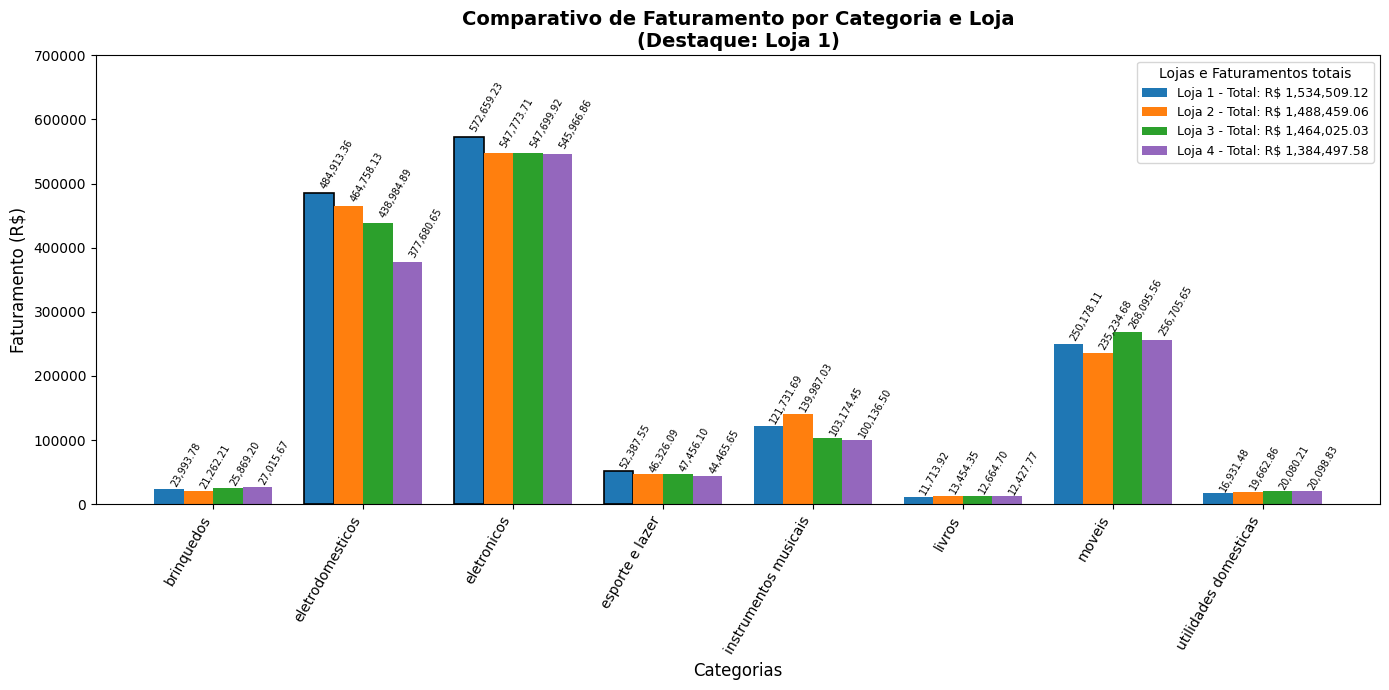

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dados = faturamentos_por_categoria

df = pd.DataFrame(dados, index=lojas_nomes).T.astype(float)

totais_lojas = df.sum()
loja_campea = totais_lojas.idxmax()

cores_lojas = {
    'Loja 1': '#1f77b4',
    'Loja 2': '#ff7f0e',
    'Loja 3': '#2ca02c',
    'Loja 4': '#9467bd'
}

categorias = df.index
num_categorias = len(categorias)
num_lojas = len(df.columns)
largura_barra = 0.28
espacamento = 0.3

x = np.arange(num_categorias) * (num_lojas * largura_barra + espacamento)

fig, ax = plt.subplots(figsize=(14, 7))

for i, loja in enumerate(df.columns):
    valores = df.iloc[:, i]
    melhor = valores == df.max(axis=1)

    cores_barras = []
    contornos = []
    for idx in range(len(valores)):
        if melhor.iloc[idx] and loja == loja_campea:
            contornos.append('black')
        else:
            cores_barras.append(cores_lojas[loja])
            contornos.append('none')

    barras = ax.bar(x + i * largura_barra, valores, width=largura_barra,
                    label=f"{loja} - Total: R$ {totais_lojas[loja]:,.2f}",
                    color=cores_barras, edgecolor=contornos, linewidth=1.2)

    for barra in barras:
        altura = barra.get_height()
        ax.text(barra.get_x() + barra.get_width() / 2, altura + (altura * 0.01),
                f'{altura:,.2f}', ha='left', va='bottom', fontsize=7, rotation=60)

ax.set_xlabel("Categorias", fontsize=12)
ax.set_ylabel("Faturamento (R$)", fontsize=12)
ax.set_title(f"Comparativo de Faturamento por Categoria e Loja\n(Destaque: {loja_campea})",
             fontsize=14, fontweight="bold")

ax.set_xticks(x + (largura_barra * (num_lojas - 1) / 2))
ax.set_xticklabels(categorias, rotation=60, ha='right')

ax.legend(title="Lojas e Faturamentos totais", fontsize=9)

plt.tight_layout()
plt.ylim(0, 700000)
plt.show()


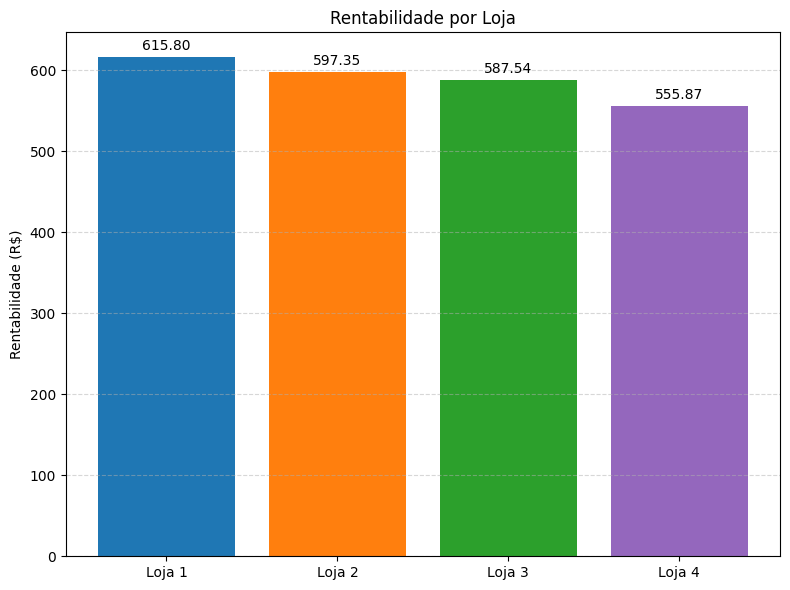

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

lojas = lojas_nomes
faturamento = faturamentos_total
fretes_medios = frete_medio_lojas
vendas_por_categoria = vendas_categoria
colors = ['#1f77b4','#ff7f0e','#2ca02c','#9467bd']

total_vendas = [sum(v[i] for v in vendas_por_categoria.values()) for i in range(4)]

lucros_estimados = [faturamento[i] - total_vendas[i] * fretes_medios[i] for i in range(4)]
rentabilidade_por_venda = [lucros_estimados[i] / total_vendas[i] for i in range(4)]

plt.figure(figsize=(8, 6))
bars = plt.bar(lojas, rentabilidade_por_venda, color= colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:.2f}', ha='center', va='bottom')

plt.title('Rentabilidade por Loja')
plt.ylabel('Rentabilidade (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


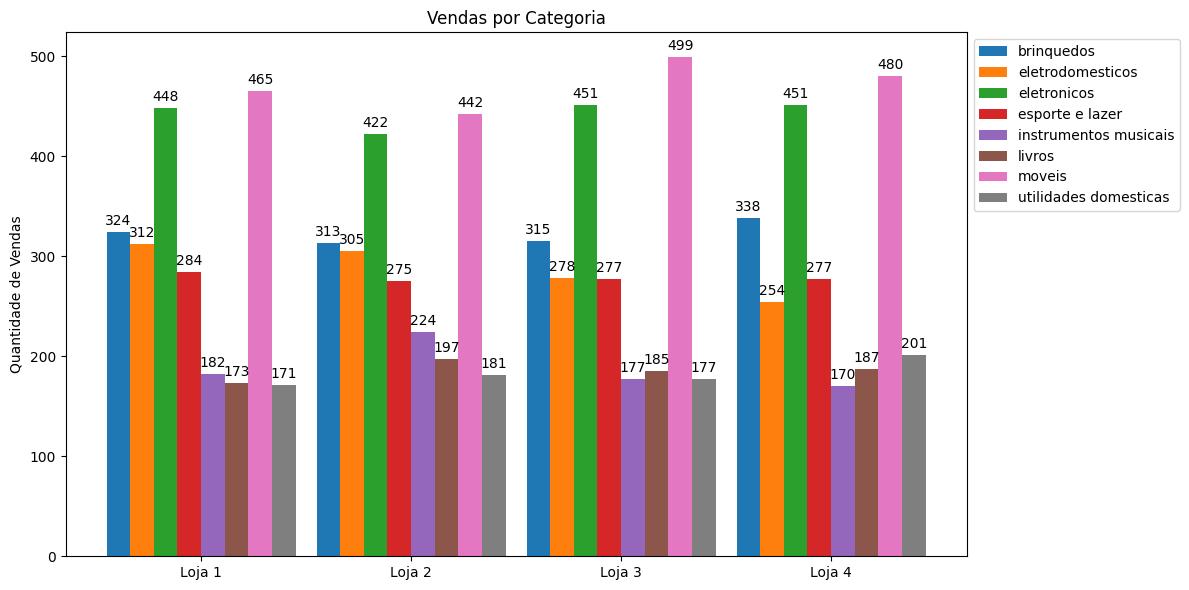

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


lojas_list = lojas_nomes
categorias = vendas_categoria

x = np.arange(len(lojas_list))
num_categorias = len(categorias)
width = 0.9 / num_categorias
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6))

for attribute, measurement in categorias.items():
    offset = width * multiplier - (width * num_categorias / 2) + width / 2
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Quantidade de Vendas')
ax.set_title('Vendas por Categoria')
ax.set_xticks(x)
ax.set_xticklabels(lojas_list)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(0)

plt.tight_layout()
plt.show()


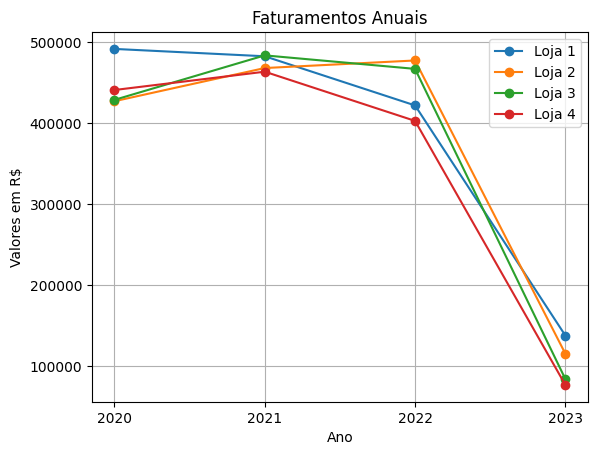

In [ ]:
import matplotlib.pyplot as plt


dados = faturamento_lojas
pontos = range(len(anos))

for i, loja in enumerate(dados, start=1):
    plt.plot(pontos, loja, marker='o', label=f'Loja {i}')

plt.title('Faturamentos Anuais')
plt.xlabel('Ano')
plt.ylabel('Valores em R$')
plt.xticks(pontos, anos)
plt.legend()
plt.grid(True)

plt.show()

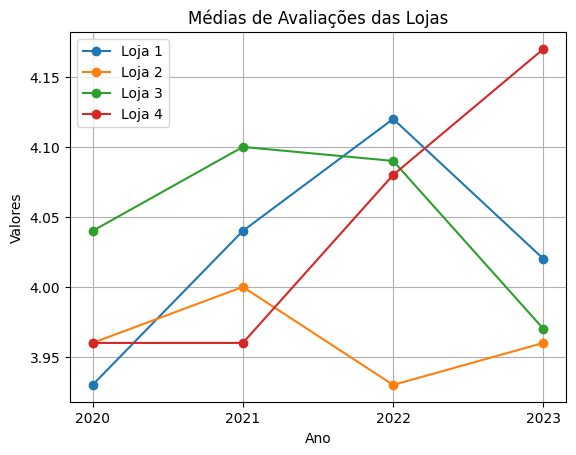

In [ ]:
import matplotlib.pyplot as plt


dados = media_avaliacao_anual
pontos = range(len(anos))

for i, loja in enumerate(dados, start=1):
    plt.plot(pontos, loja, marker='o', label=f'Loja {i}')

plt.title('Médias de Avaliações das Lojas')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.xticks(pontos, anos)
plt.legend()
plt.grid(True)

plt.show()


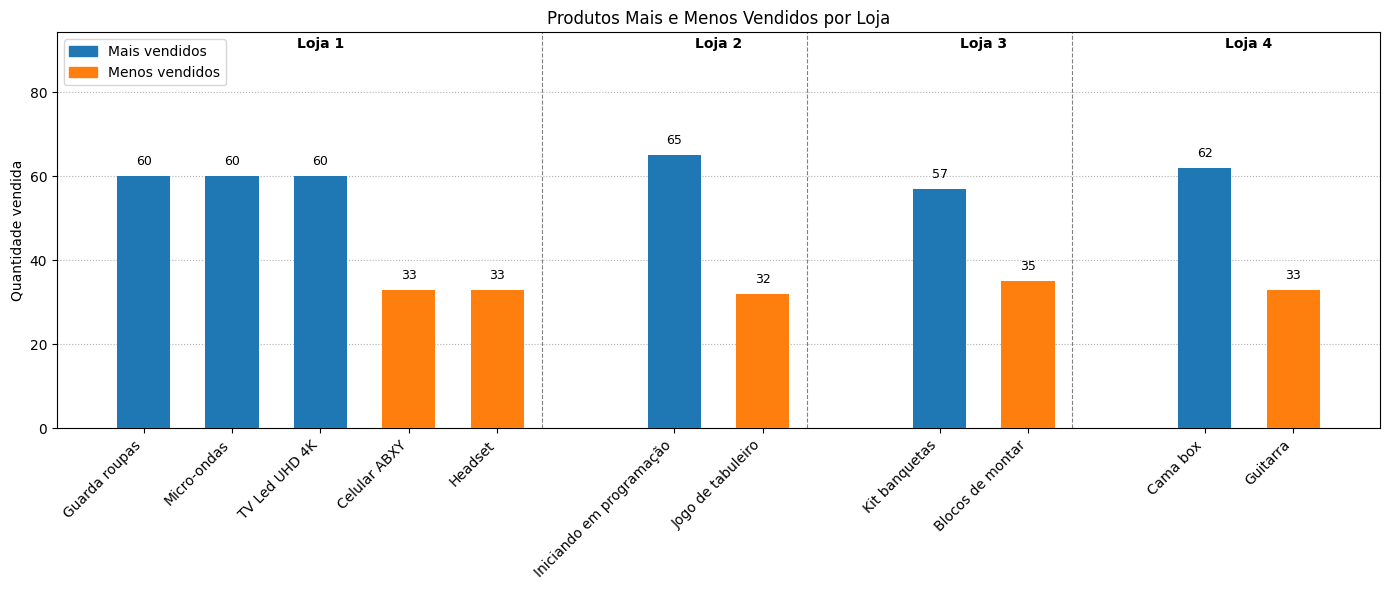

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


lojas = lojas_nomes
dados = mais_e_menos_vendidos

gap = 1
offset = 0
x_positions = []
labels = []
heights = []
categories = []
group_centers = []
group_boundaries = []

for i, (mais, menos) in enumerate(dados):
    n = len(mais) + len(menos)
    pos = np.arange(offset, offset + n)
    idx = 0
    for name, val in mais:
        x_positions.append(pos[idx])
        labels.append(name)
        heights.append(val)
        categories.append("Mais vendidos")
        idx += 1
    for name, val in menos:
        x_positions.append(pos[idx])
        labels.append(name)
        heights.append(val)
        categories.append("Menos vendidos")
        idx += 1

    group_centers.append(pos.mean())
    group_boundaries.append((pos[0], pos[-1]))
    offset += n + gap


fig, ax = plt.subplots(figsize=(14, 6))
width = 0.6


color_map = {'Mais vendidos': 'tab:blue', 'Menos vendidos': 'tab:orange'}
colors = [color_map[c] for c in categories]

bars = ax.bar(x_positions, heights, width=width, color=colors, zorder=3)

y_max = max(heights) if heights else 0
y_offset = y_max * 0.03 if y_max else 0.2
for bar, h in zip(bars, heights):
    ax.text(bar.get_x() + bar.get_width() / 2, h + y_offset, str(h),
            ha='center', va='bottom', fontsize=9)

ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_ylim(0, y_max * 1.45)

for i, center in enumerate(group_centers):
    ax.text(center, y_max * 1.38, lojas[i], ha='center', va='bottom', fontweight='bold')

for start, end in group_boundaries[:-1]:
    sep_x = end + 0.5
    ax.axvline(sep_x, color='gray', linestyle='--', linewidth=0.8, zorder=1)

handles = [Patch(color=color_map['Mais vendidos'], label='Mais vendidos'),
           Patch(color=color_map['Menos vendidos'], label='Menos vendidos')]
ax.legend(handles=handles)

ax.set_ylabel("Quantidade vendida")
ax.set_title("Produtos Mais e Menos Vendidos por Loja")

ax.grid(axis='y', linestyle=':', zorder=0)
plt.tight_layout()
plt.show()



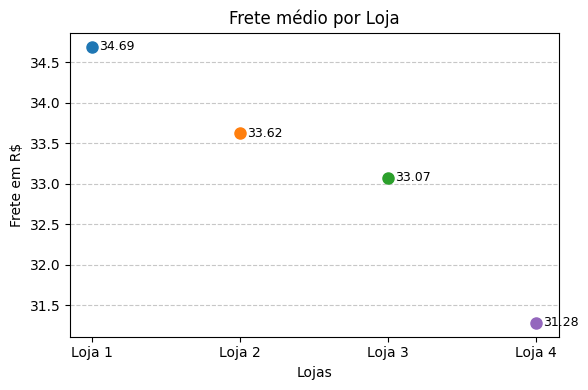

In [ ]:
import matplotlib.pyplot as plt

valores = frete_medio_lojas
lojas = lojas_nomes

cores = ['#1f77b4','#ff7f0e','#2ca02c','#9467bd']

plt.figure(figsize=(6, 4))

for i, (loja, valor) in enumerate(zip(lojas, valores)):
    plt.plot(loja, valor, 'o', markersize=8, color=cores[i % len(cores)])
    plt.annotate(f"{valor:.2f}", xy=(i, valor),
                 ha='left', va='center', fontsize=9,
                 xytext=(5, 0), textcoords='offset points')

plt.title("Frete médio por Loja")
plt.ylabel("Frete em R$")
plt.xlabel("Lojas")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(len(lojas)), lojas)
plt.tight_layout()
plt.show()


# **Relatório Final: Análise de Desempenho das Lojas**
## **Introdução**
Este relatório apresenta uma análise detalhada do desempenho de 4 lojas (2020-2023), com cálculos explícitos e justificativas quantitativas para a recomendação de venda da loja de pior desempenho. Todos os cálculos foram realizados com base nos dados fornecidos.

## 1. Análise de Faturamento
Faturamento Total (2020-2023)

Ranking:

Loja 1: R$ 1.534.509,12

Loja 2: R$ 1.488.459,06

Loja 3: R$ 1.464.025,03

Loja 4: R$ 1.384.497,58

###Tendência Anual (Cálculo de Queda)

Loja 1: ((137681.46 - 422086.24)/422086.24) × 100 = -67.4%

Loja 4: ((76643.56 - 402961.23)/402961.23) × 100 = -81.0%

Queda em 2023:

Loja 1: -67.4%

Loja 4: -81.0% (maior queda entre todas)

###Redução Acumulada (2020→2023)

Loja 1: ((137681.46 - 491911.51)/491911.51) × 100 = -72.0%

Loja 4: ((76643.56 - 441129.52)/441129.52) × 100 = -82.6%

Redução Acumulada:

Loja 1: -72.0%

Loja 4: -82.6% (maior redução)

## 2. Desempenho por Categoria (Cálculos Detalhados)
Método: Comparação com Média Geral


Desempenho = ((Valor Loja - Média) / Média) × 100

**Eletrodomésticos (Categoria-chave)**

Média = (484913.36 + 464758.13 + 438984.89 + 377680.65) / 4 = 441584.26

Loja 1: ((484913.36 - 441584.26)/441584.26) × 100 = +9.8%

Loja 4: ((377680.65 - 441584.26)/441584.26) × 100 = -14.5%
Resultado:

✅ Loja 1: +9.8% acima da média

❌ Loja 4: -14.5% abaixo da média

**Eletrônicos (2ª categoria mais relevante)**

Média = (572659.23 + 547773.71 + 547699.92 + 545966.86) / 4 = 553524.93

Loja 1: ((572659.23 - 553524.93)/553524.93) × 100 = +3.5%

Loja 4: ((545966.86 - 553524.93)/553524.93) × 100 = -1.4%

Resultado:

✅ Loja 1: +3.5% acima da média

❌ Loja 4: -1.4% abaixo da média

## 3. Indicadores Operacionais
Ticket Médio

Total Vendas = Soma vendas por categoria

Ticket Médio = Faturamento Total / Total Vendas

**Loja 1:**

  Vendas = 324+312+448+284+182+173+465+171 = 2359

  Ticket = 1534509.12 / 2359 = 650.49

**Loja 4:**

  Vendas = 338+254+451+277+170+187+480+201 = 2358

  Ticket = 1384497.58 / 2358 = 587.09

**Comparação:**

✅ Loja 1: R$ 650,49

❌ Loja 4: R$ 587,09 (10.8% menor que líder)

###Eficiência Logística

Frete Médio Loja 4: 31.28 (menor entre todas)

Porém: Economia de frete não compensa perda de R$ 150.011,54 no faturamento

##4. Análise de Produtos

Loja 4:

Produto mais vendido: Cama box (62 unidades)

Categoria: Móveis (ticket médio = R$ 708,53)

Ausência em categorias premium:

Nenhum eletrônico/eletrodoméstico entre os mais vendidos

Comparação com Loja 1:

Micro-ondas (60 unidades) → Ticket médio: R$ 772,48

TV 4K (60 unidades) → Ticket médio: R$  3.158,90

##5. Satisfação do Cliente

Média Geral = (3.98 + 4.04 + 4.05 + 4.00) / 4 = 4.0175

Loja 1: 3.98 (0.9% abaixo da média)

Loja 4: 4.00 (0.4% abaixo da média)

Conclusão: A diferença de 0.02 pontos não compensa as deficiências operacionais e financeiras da Loja 4.

##Conclusão Final: Recomendação de Venda
Loja Selecionada: LOJA 4

**Fatores Decisivos:**

Menor faturamento histórico (R$ 150k abaixo da líder)

Maior queda percentual em 2023 (-81% vs -67.4% da líder)

Pior desempenho em categorias estratégicas (eletrodomésticos -14.5% vs média)

Menor valor por transação (ticket 9.7% inferior)

Mix de produtos menos lucrativo (foco em categorias de baixo valor)